## DATASCI 3ML3 FINAL PROJECT. 
Name: Zeel Patel



In [1]:
import pandas as pd
import os

In [2]:
file_name = "Food Delivery Time Prediction Case Study.xlsx"
directory_path = "/Users/apple/Desktop/DATASCI FINAL PROJECT/"

In [4]:
file_path = os.path.join(directory_path, file_name)

# Load the dataset into a pandas DataFrame
df = pd.read_excel(file_path)


In [5]:
# Display the first few rows of the DataFrame 
df.head(11)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30
5,9BB4,HYDRES09DEL03,22,4.8,17.431668,78.408321,17.461668,78.438321,Buffet,motorcycle,26
6,95B4,RANCHIRES15DEL01,33,4.7,23.369746,85.339820,23.479746,85.449820,Meal,scooter,40
7,9EB2,MYSRES15DEL02,35,4.6,12.352058,76.606650,12.482058,76.736650,Meal,motorcycle,32
8,1102,HYDRES05DEL02,22,4.8,17.433809,78.386744,17.563809,78.516744,Buffet,motorcycle,34
9,CDCD,DEHRES17DEL01,36,4.2,30.327968,78.046106,30.397968,78.116106,Snack,motorcycle,46


In [6]:
#droping unnecessary columns. 
df = df.drop(['ID', 'Delivery_person_ID'], axis=1)

In [7]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='if_binary')

encoded_features = encoder.fit_transform(df[['Type_of_order', 'Type_of_vehicle']])

# Convert the encoded features into a DataFrame
encoded_df = pd.DataFrame(encoded_features.toarray(), columns=encoder.get_feature_names_out(['Type_of_order', 'Type_of_vehicle']))

df = pd.concat([df, encoded_df], axis=1)

# Drop the original categorical columns
df = df.drop(['Type_of_order', 'Type_of_vehicle'], axis=1)


In [8]:
#Getting an idea of the shape fo the dataset 
print("Shape of DataFrame:", df.shape)
df.head(11)

Shape of DataFrame: (45593, 15)


,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_taken(min),Type_of_order_Buffet,Type_of_order_Drinks,Type_of_order_Meal,Type_of_order_Snack,Type_of_vehicle_bicycle,Type_of_vehicle_electric_scooter,Type_of_vehicle_motorcycle,Type_of_vehicle_scooter
0,37,4.9,22.745049,75.892471,22.765049,75.912471,24,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,34,4.5,12.913041,77.683237,13.043041,77.813237,33,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,23,4.4,12.914264,77.678400,12.924264,77.688400,26,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,38,4.7,11.003669,76.976494,11.053669,77.026494,21,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,32,4.6,12.972793,80.249982,13.012793,80.289982,30,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5,22,4.8,17.431668,78.408321,17.461668,78.438321,26,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,33,4.7,23.369746,85.339820,23.479746,85.449820,40,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7,35,4.6,12.352058,76.606650,12.482058,76.736650,32,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
8,22,4.8,17.433809,78.386744,17.563809,78.516744,34,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,36,4.2,30.327968,78.046106,30.397968,78.116106,46,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [9]:
#Finding the basic statistics of the dataset
df.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_taken(min),Type_of_order_Buffet,Type_of_order_Drinks,Type_of_order_Meal,Type_of_order_Snack,Type_of_vehicle_bicycle,Type_of_vehicle_electric_scooter,Type_of_vehicle_motorcycle,Type_of_vehicle_scooter
count,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000
mean,29.544075,4.632367,17.017729,70.231332,17.465186,70.845702,26.294607,0.247406,0.248328,0.251311,0.252955,0.001491,0.083653,0.579804,0.335051
std,5.696793,0.327708,8.185109,22.883647,7.335122,21.118812,9.383806,0.431510,0.432048,0.433771,0.434710,0.038591,0.276870,0.493596,0.472014
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,4.600000,12.933284,73.170000,12.988453,73.280000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,29.000000,4.700000,18.546947,75.898497,18.633934,76.002574,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,34.000000,4.800000,22.728163,78.044095,22.785049,78.107044,32.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,54.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
#checking for null values 
df.isnull().sum()

Delivery_person_Age                  0
Delivery_person_Ratings              0
Restaurant_latitude                  0
Restaurant_longitude                 0
Delivery_location_latitude           0
Delivery_location_longitude          0
Time_taken(min)                      0
Type_of_order_Buffet                 0
Type_of_order_Drinks                 0
Type_of_order_Meal                   0
Type_of_order_Snack                  0
Type_of_vehicle_bicycle              0
Type_of_vehicle_electric_scooter     0
Type_of_vehicle_motorcycle           0
Type_of_vehicle_scooter              0
dtype: int64

In [12]:
# Import necessary libraries
from geopy.distance import geodesic
import pandas as pd


In [13]:
# EDA: for deriving the distance, we use Vincenty Formula. 
# Define function to calculate distance between two points in miles
def get_distance(row):
    point1 = (row['Restaurant_latitude'], row['Restaurant_longitude'])
    point2 = (row['Delivery_location_latitude'], row['Delivery_location_longitude'])
    return geodesic(point1, point2).miles

# Calculate distance for all points and store in a new column 'Distance_miles'
df['Distance_miles'] = df.apply(get_distance, axis=1)

# Display the first few rows of the DataFrame with the Distance_miles column
print(df.head())

   Delivery_person_Age  Delivery_person_Ratings  Restaurant_latitude  \
0                   37                      4.9            22.745049   
1                   34                      4.5            12.913041   
2                   23                      4.4            12.914264   
3                   38                      4.7            11.003669   
4                   32                      4.6            12.972793   

   Restaurant_longitude  Delivery_location_latitude  \
0             75.892471                   22.765049   
1             77.683237                   13.043041   
2             77.678400                   12.924264   
3             76.976494                   11.053669   
4             80.249982                   13.012793   

   Delivery_location_longitude  Time_taken(min)  Type_of_order_Buffet   \
0                    75.912471               24                    0.0   
1                    77.813237               33                    0.0   
2             

In [14]:
#observe the statistics for the distance_miles column 
df.head(11)

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_taken(min),Type_of_order_Buffet,Type_of_order_Drinks,Type_of_order_Meal,Type_of_order_Snack,Type_of_vehicle_bicycle,Type_of_vehicle_electric_scooter,Type_of_vehicle_motorcycle,Type_of_vehicle_scooter,Distance_miles
0,37,4.9,22.745049,75.892471,22.765049,75.912471,24,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.876999
1,34,4.5,12.913041,77.683237,13.043041,77.813237,33,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,12.516738
2,23,4.4,12.914264,77.678400,12.924264,77.688400,26,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.962935
3,38,4.7,11.003669,76.976494,11.053669,77.026494,21,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.830848
4,32,4.6,12.972793,80.249982,13.012793,80.289982,30,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3.851195
5,22,4.8,17.431668,78.408321,17.461668,78.438321,26,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.859678
6,33,4.7,23.369746,85.339820,23.479746,85.449820,40,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,10.300400
7,35,4.6,12.352058,76.606650,12.482058,76.736650,32,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,12.529942
8,22,4.8,17.433809,78.386744,17.563809,78.516744,34,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,12.390278
9,36,4.2,30.327968,78.046106,30.397968,78.116106,46,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,6.382392


In [15]:
from sklearn.preprocessing import MinMaxScaler

# Define the columns to scale
columns_to_scale = ['Delivery_person_Age', 'Delivery_person_Ratings', 
                    'Restaurant_latitude', 'Restaurant_longitude', 
                    'Delivery_location_latitude', 'Delivery_location_longitude', 
                    'Distance_miles', 'Time_taken(min)']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
df_scaled = df.copy()
df_scaled[columns_to_scale] = scaler.fit_transform(df_scaled[columns_to_scale])


In [16]:
df_scaled.head(11)

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_taken(min),Type_of_order_Buffet,Type_of_order_Drinks,Type_of_order_Meal,Type_of_order_Snack,Type_of_vehicle_bicycle,Type_of_vehicle_electric_scooter,Type_of_vehicle_motorcycle,Type_of_vehicle_scooter,Distance_miles
0,0.628571,0.78,0.867857,0.929067,0.732992,0.857137,0.318182,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.000079
1,0.542857,0.70,0.708814,0.939196,0.419824,0.878602,0.522727,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.000948
2,0.228571,0.68,0.708834,0.939168,0.415998,0.877192,0.363636,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000004
3,0.657143,0.74,0.677928,0.935198,0.355742,0.869718,0.250000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000320
4,0.485714,0.72,0.709780,0.953713,0.418850,0.906571,0.454545,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.000240
5,0.200000,0.76,0.781908,0.943297,0.562158,0.885661,0.363636,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000159
6,0.514286,0.74,0.877963,0.982502,0.756014,0.964839,0.681818,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.000767
7,0.571429,0.72,0.699739,0.933106,0.401753,0.866444,0.500000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.000949
8,0.200000,0.76,0.781942,0.943175,0.565448,0.886546,0.545455,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000938
9,0.600000,0.64,0.990519,0.941248,0.978866,0.882022,0.818182,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.000447


In [17]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target variable (y)
X = df_scaled.drop('Time_taken(min)', axis=1)  # Features
y = df_scaled['Time_taken(min)']  # Target variable


In [18]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [21]:
#base model for dt and gb
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

def model_01(model, X_train, y_train, X_test, y_test):
    # Let's calculate some metric MSE
    ypredict_train = model.predict(X_train)
    ypredict_test = model.predict(X_test)
    
    metric = []
    
    # Mean Squared Error (MSE)
    mse_train = mean_squared_error(y_train, ypredict_train)
    mse_test = mean_squared_error(y_test, ypredict_test)
    
    # Create a DataFrame to store the metrics
    df = pd.DataFrame({
        'Metric': ['MSE (Mean Squared Error)'],
        'Train': [mse_train],
        'Test': [mse_test]
    })
    
    return df, ypredict_train, ypredict_test


Decision Tree Model:
                     Metric     Train      Test
0  MSE (Mean Squared Error)  0.000377  0.011473


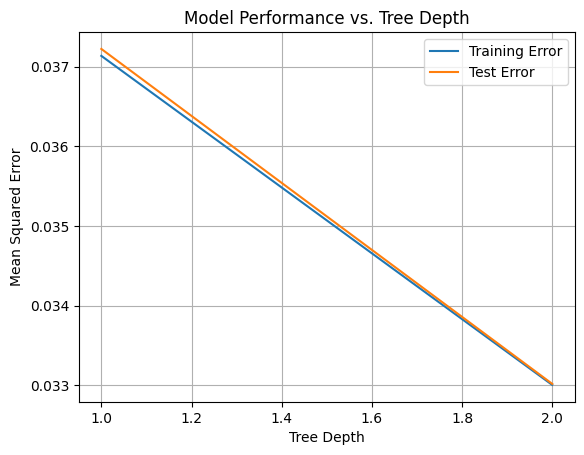

Best Depth for Training Error: 2
Best Depth for Test Error: 2


In [108]:
#decision tree (1,3)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

metric_df_dt, ypredict_train_dt, ypredict_test_dt = model_01(dt_model, X_train, y_train, X_test, y_test)
print("Decision Tree Model:")
print(metric_df_dt)

depths = range(1,3)  # Adjust the range of depths as needed

train_errors = [mean_squared_error(y_train, DecisionTreeRegressor(max_depth=depth, random_state=42).fit(X_train, y_train).predict(X_train)) for depth in depths]
test_errors = [mean_squared_error(y_test, DecisionTreeRegressor(max_depth=depth, random_state=42).fit(X_train, y_train).predict(X_test)) for depth in depths]

plt.plot(depths, train_errors, label='Training Error')
plt.plot(depths, test_errors, label='Test Error')
plt.xlabel('Tree Depth')
plt.ylabel('Mean Squared Error')
plt.title('Model Performance vs. Tree Depth')
plt.legend()
plt.grid(True)
plt.show()

# Find the depths with the lowest training and test errors
best_train_depth = depths[np.argmin(train_errors)]
best_test_depth = depths[np.argmin(test_errors)]
print(f"Best Depth for Training Error: {best_train_depth}")
print(f"Best Depth for Test Error: {best_test_depth}")

Decision Tree Model:
                     Metric     Train      Test
0  MSE (Mean Squared Error)  0.000377  0.011454


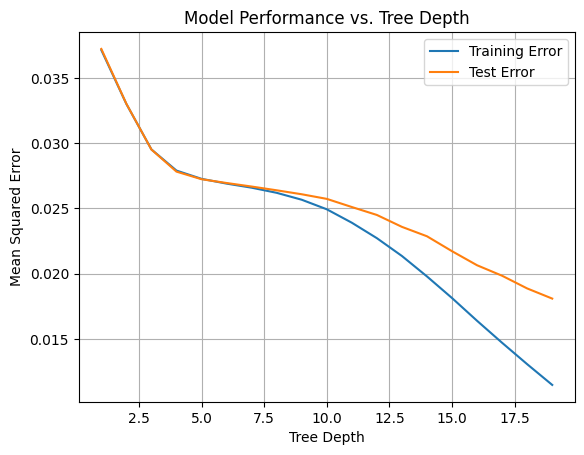

Best Depth for Training Error: 19
Best Depth for Test Error: 19


In [117]:
#decision tree (1,20)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

metric_df_dt, ypredict_train_dt, ypredict_test_dt = model_01(dt_model, X_train, y_train, X_test, y_test)
print("Decision Tree Model:")
print(metric_df_dt)

depths = range(1,20)  # Adjust the range of depths as needed

train_errors = [mean_squared_error(y_train, DecisionTreeRegressor(max_depth=depth, random_state=42).fit(X_train, y_train).predict(X_train)) for depth in depths]
test_errors = [mean_squared_error(y_test, DecisionTreeRegressor(max_depth=depth, random_state=42).fit(X_train, y_train).predict(X_test)) for depth in depths]

plt.plot(depths, train_errors, label='Training Error')
plt.plot(depths, test_errors, label='Test Error')
plt.xlabel('Tree Depth')
plt.ylabel('Mean Squared Error')
plt.title('Model Performance vs. Tree Depth')
plt.legend()
plt.grid(True)
plt.show()

# Find the depths with the lowest training and test errors
best_train_depth = depths[np.argmin(train_errors)]
best_test_depth = depths[np.argmin(test_errors)]
print(f"Best Depth for Training Error: {best_train_depth}")
print(f"Best Depth for Test Error: {best_test_depth}")

Decision Tree Model:
                     Metric     Train      Test
0  MSE (Mean Squared Error)  0.000377  0.011377


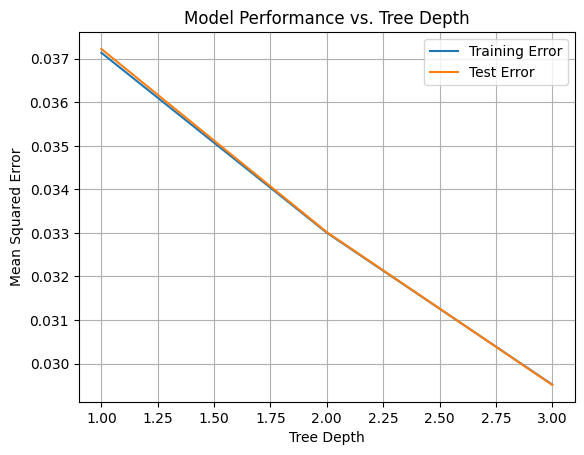

Best Depth for Training Error: 3
Best Depth for Test Error: 3


In [109]:
#decision tree (1,4)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

metric_df_dt, ypredict_train_dt, ypredict_test_dt = model_01(dt_model, X_train, y_train, X_test, y_test)
print("Decision Tree Model:")
print(metric_df_dt)

depths = range(1,4)  # Adjust the range of depths as needed

train_errors = [mean_squared_error(y_train, DecisionTreeRegressor(max_depth=depth, random_state=42).fit(X_train, y_train).predict(X_train)) for depth in depths]
test_errors = [mean_squared_error(y_test, DecisionTreeRegressor(max_depth=depth, random_state=42).fit(X_train, y_train).predict(X_test)) for depth in depths]

plt.plot(depths, train_errors, label='Training Error')
plt.plot(depths, test_errors, label='Test Error')
plt.xlabel('Tree Depth')
plt.ylabel('Mean Squared Error')
plt.title('Model Performance vs. Tree Depth')
plt.legend()
plt.grid(True)
plt.show()

# Find the depths with the lowest training and test errors
best_train_depth = depths[np.argmin(train_errors)]
best_test_depth = depths[np.argmin(test_errors)]
print(f"Best Depth for Training Error: {best_train_depth}")
print(f"Best Depth for Test Error: {best_test_depth}")

Gradient Boosting Model:
                     Metric    Train      Test
0  MSE (Mean Squared Error)  0.02661  0.026978


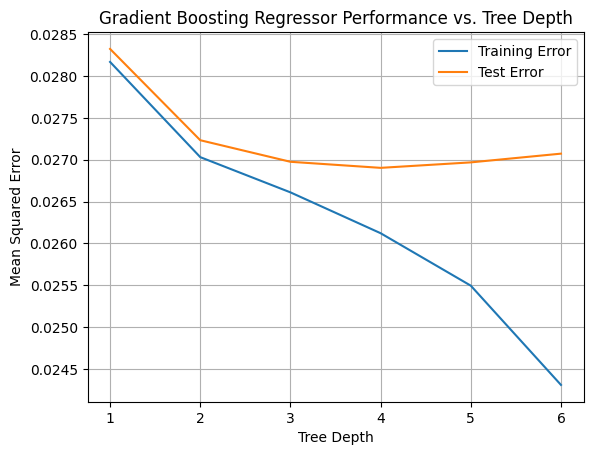

Best Depth for Training Error: 6
Best Depth for Test Error: 4


In [26]:
# Gradient boosting (1,7)
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

metric_df_gb, ypredict_train_gb, ypredict_test_gb = model_01(gb_model, X_train, y_train, X_test, y_test)
print("Gradient Boosting Model:")
print(metric_df_gb)

depths = range(1, 7)  # Adjust the range of depths as needed

train_errors = [mean_squared_error(y_train, GradientBoostingRegressor(max_depth=depth).fit(X_train, y_train).predict(X_train)) for depth in depths]
test_errors = [mean_squared_error(y_test, GradientBoostingRegressor(max_depth=depth).fit(X_train, y_train).predict(X_test)) for depth in depths]

plt.plot(depths, train_errors, label='Training Error')
plt.plot(depths, test_errors, label='Test Error')
plt.xlabel('Tree Depth')
plt.ylabel('Mean Squared Error')
plt.title('Gradient Boosting Regressor Performance vs. Tree Depth')
plt.legend()
plt.grid(True)
plt.show()

# Find the depths with the lowest training and test errors
best_train_depth = depths[np.argmin(train_errors)]
best_test_depth = depths[np.argmin(test_errors)]
print(f"Best Depth for Training Error: {best_train_depth}")
print(f"Best Depth for Test Error: {best_test_depth}")

Gradient Boosting Model:
                     Metric     Train      Test
0  MSE (Mean Squared Error)  0.026812  0.026802


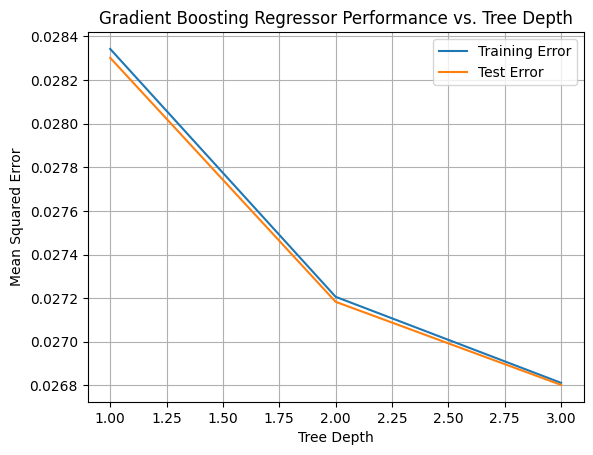

Best Depth for Training Error: 3
Best Depth for Test Error: 3


In [114]:
# Gradient boosting (1,4)
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

metric_df_gb, ypredict_train_gb, ypredict_test_gb = model_01(gb_model, X_train, y_train, X_test, y_test)
print("Gradient Boosting Model:")
print(metric_df_gb)

depths = range(1, 4)  # Adjust the range of depths as needed

train_errors = [mean_squared_error(y_train, GradientBoostingRegressor(max_depth=depth).fit(X_train, y_train).predict(X_train)) for depth in depths]
test_errors = [mean_squared_error(y_test, GradientBoostingRegressor(max_depth=depth).fit(X_train, y_train).predict(X_test)) for depth in depths]

plt.plot(depths, train_errors, label='Training Error')
plt.plot(depths, test_errors, label='Test Error')
plt.xlabel('Tree Depth')
plt.ylabel('Mean Squared Error')
plt.title('Gradient Boosting Regressor Performance vs. Tree Depth')
plt.legend()
plt.grid(True)
plt.show()

# Find the depths with the lowest training and test errors
best_train_depth = depths[np.argmin(train_errors)]
best_test_depth = depths[np.argmin(test_errors)]
print(f"Best Depth for Training Error: {best_train_depth}")
print(f"Best Depth for Test Error: {best_test_depth}")

In [36]:
# Small neural network model
model_04 = Sequential([
    Dense(10, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(1) 
])

# Compile the model
model_04.compile(optimizer='rmsprop', loss='mean_squared_error')

# Train the model
history_small_model = model_04.fit(X_train, y_train, epochs=50, batch_size=128, validation_split=0.2)


Epoch 1/50
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0766 - val_loss: 0.0439
Epoch 2/50
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0418 - val_loss: 0.0419
Epoch 3/50
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0399 - val_loss: 0.0402
Epoch 4/50
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0387 - val_loss: 0.0396
Epoch 5/50
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0390 - val_loss: 0.0389
Epoch 6/50
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0376 - val_loss: 0.0385
Epoch 7/50
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0375 - val_loss: 0.0383
Epoch 8/50
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0373 - val_loss: 0.0380
Epoch 9/50
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0366 - val_loss: 0.0378
Epoch 10/50
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0368 - val_loss: 0.0375
Epoch 11/50
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0370 - val_loss: 0.0376
Epoch 12/50
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

428/428 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0360
Test Loss: 0.03607228398323059
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 1s 981us/step
Mean Squared Error (MSE) for training data: 0.03607497909798289
428/428 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step
Mean Squared Error (MSE) for test data: 0.03609767022159636


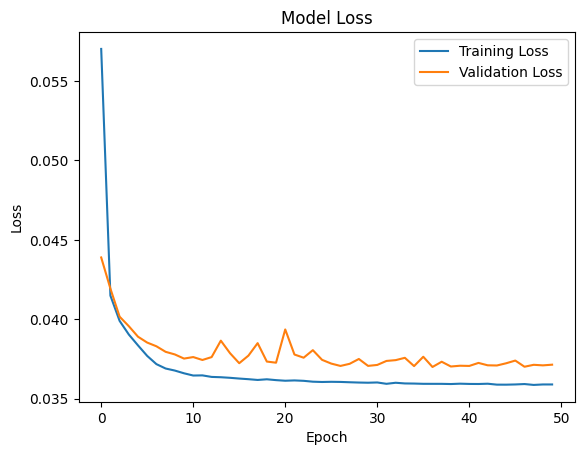

In [116]:
import matplotlib.pyplot as plt
# Calculate test loss
test_loss = model_04.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
# Calculate MSE for training data
mse_train = mean_squared_error(y_train, model_04.predict(X_train))
print("Mean Squared Error (MSE) for training data:", mse_train)
# Calculate MSE for test data
mse_test = mean_squared_error(y_test, model_04.predict(X_test))
print("Mean Squared Error (MSE) for test data:", mse_test)


# Plot training loss
plt.plot(history_small_model.history['loss'], label='Training Loss')
# Plot validation loss
plt.plot(history_small_model.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [28]:
#neural network model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import numpy as np


num_features = X_train.shape[1] 

# Define the model architecture
model_02 = Sequential([
    Dense(128, activation='relu', input_shape=(num_features,)),
    Dense(64, activation='relu'),
    Dense(1)  
])

# Compile the model
model_02.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model_02.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    batch_size=64,
                    epochs=50,
                    verbose=1,
                    shuffle=True)


2024-04-26 11:29:06.512277: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/50


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0524 - val_loss: 0.0375
Epoch 2/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0369 - val_loss: 0.0367
Epoch 3/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0376 - val_loss: 0.0367
Epoch 4/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0366 - val_loss: 0.0358
Epoch 5/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0355 - val_loss: 0.0359
Epoch 6/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0362 - val_loss: 0.0353
Epoch 7/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0352 - val_loss: 0.0352
Epoch 8/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0350 - val_loss: 0.0348
Epoch 9/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0346 - val_loss: 0.0384
Epoch 10/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0353 - val_loss: 0.0351
Epoch 11/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0343 - val_loss: 0.0352
Epoch 12/50
499/499 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.

Test Loss: 0.03255172073841095
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Mean Squared Error (MSE) for training data: 0.03238161095349632
428/428 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Mean Squared Error (MSE) for test data: 0.03257640276547331


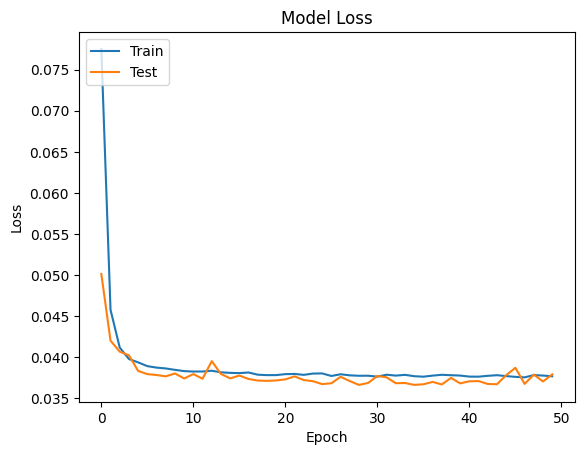

In [91]:
#test loss and plot for nn
# calculate test loss
loss = model_02.evaluate(X_test, y_test, verbose=0)
print("Test Loss:", loss)
# Calculate MSE for training data
mse_train = mean_squared_error(y_train, model_02.predict(X_train))
print("Mean Squared Error (MSE) for training data:", mse_train)
# Calculate MSE for test data
mse_test = mean_squared_error(y_test, model_02.predict(X_test))
print("Mean Squared Error (MSE) for test data:", mse_test)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')


In [43]:
#nn model with regularization
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers


num_features = X_train.shape[1]

# Define the model architecture with regularization
model_03 = Sequential([
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(num_features,)),
    Dropout(0.2),  # Dropout layer with a dropout rate of 20%
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.2),  # Dropout layer with a dropout rate of 20%
    Dense(1)      
])

# Compile the model
model_03.compile(optimizer='adam', loss='mse')

# Train the model
history = model_03.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=64, verbose=1)


Epoch 1/50


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


570/570 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1060 - val_loss: 0.0501
Epoch 2/50
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0485 - val_loss: 0.0420
Epoch 3/50
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0417 - val_loss: 0.0407
Epoch 4/50
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0402 - val_loss: 0.0402
Epoch 5/50
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0395 - val_loss: 0.0383
Epoch 6/50
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0394 - val_loss: 0.0379
Epoch 7/50
570/570 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0384 - val_loss: 0.0378
Epoch 8/50
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0385 - val_loss: 0.0377
Epoch 9/50
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0383 - val_loss: 0.0380
Epoch 10/50
570/570 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0384 - val_loss: 0.0374
Epoch 11/50
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0384 - val_loss: 0.0380
Epoch 12/50
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.

Test Loss: 0.0379117876291275
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Mean Squared Error (MSE) for training data: 0.03676896880396006
428/428 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Mean Squared Error (MSE) for test data: 0.036910547859390866


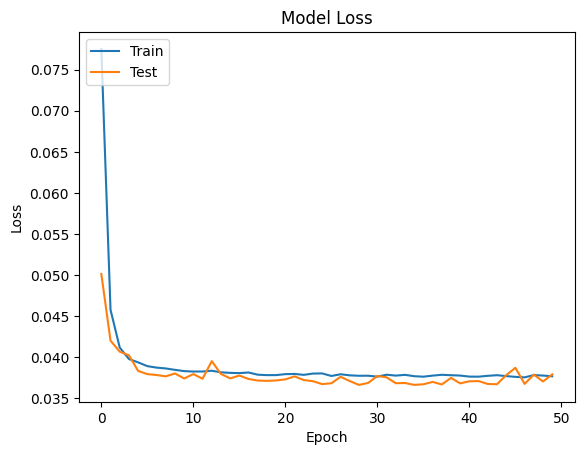

In [92]:
# test loss and plot for nn modoel with regularization
loss = model_03.evaluate(X_test, y_test, verbose=0)
print("Test Loss:", loss)
# Calculate MSE for train data
mse_train = mean_squared_error(y_train, model_03.predict(X_train))
print("Mean Squared Error (MSE) for training data:", mse_train)
# Calculate MSE for test data
mse_test = mean_squared_error(y_test, model_03.predict(X_test))
print("Mean Squared Error (MSE) for test data:", mse_test)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [74]:
from sklearn.ensemble import BaggingRegressor

# Combine predictions using Bagging
bagging_models = [dt_model, gb_model, model_02, model_04]
bagging_predictions = np.mean(np.stack([model.predict(X_test) for model in bagging_models], axis=0), axis=0)


# Evaluate Bagging performance
bagging_mse = mean_squared_error(y_test, bagging_predictions)

print("Bagging Model:")
print("Mean Squared Error (MSE):", bagging_mse)

428/428 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
428/428 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


ValueError: all input arrays must have the same shape

In [86]:
print("Shape of predictions from model_02:", model_02.predict(X_test).shape)
print("Shape of predictions from model_04:", model_04.predict(X_test).shape)
print("Shape of predictions from DecisionTreeRegressor:", dt_model.predict(X_test).shape)
print("Shape of predictions from GradientBoostingRegressor:", gb_model.predict(X_test).shape)


428/428 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Shape of predictions from model_02: (13678, 1)
428/428 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step
Shape of predictions from model_04: (13678, 1)
Shape of predictions from DecisionTreeRegressor: (13678,)
Shape of predictions from GradientBoostingRegressor: (13678,)


In [87]:
# Stack predictions from all models
all_predictions = [model.predict(X_test).flatten() for model in [model_02, model_04, dt_model, gb_model]]

# Calculate mean predictions
bagging_predictions = np.mean(np.stack(all_predictions, axis=0), axis=0)

# Evaluate Bagging performance
bagging_mse = mean_squared_error(y_test, bagging_predictions)
print("Bagging Mean Squared Error (MSE):", bagging_mse)


428/428 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
428/428 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Bagging Mean Squared Error (MSE): 0.030721526234414275
